<H2>MADATORY PYTHON LIBRARIES</H2>

In [1]:
import ftputil
import numpy as np
import pandas as pd
from shapely.geometry import box
import seaborn as sns
%matplotlib inline  

/home/protllan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Python 2 suport will be removed in ftputil 4.0.0
  if __name__ == '__main__':


<H2>AUXILIARY FUNCTIONS</H2>

In [2]:
def itemize_ftplink(indexfile):
    """returns the keys for the items resulting from splitting by '/' the file_name colummn in the index files"""
    if indexfile == 'index_history.txt':
        return ['access_protocol','blank', 'host', 'core', 'product_name', 'directory', 'platform_category', 'netCDF_file']
    elif indexfile == 'index_monthly.txt': 
        return ['access_protocol','blank', 'host', 'core', 'product_name', 'directory', 'platform_category', 'timestamp', 'netCDF_file']
    else:
        return ['access_protocol','blank', 'host', 'core', 'product_name', 'directory', 'timestamp', 'netCDF_file']

In [3]:
def itemize_netCDFname(indexfile):
    """returns the keys for the items resulting from splitting by '_' the netCDF filename"""
    if indexfile == 'index_history.txt': 
        return ['region', 'data', 'data_source', 'code', 'subsettingcode'] #RR_XX_YY_CODE<_ZZZ>.nc
    elif indexfile == 'index_monthly.txt': 
        return ['region', 'timestamp', 'data', 'data_source', 'code'] #RR_YYYYMM_XX_YY_CODE.nc
    else:
        return ['region', 'fixedname', 'data', 'data_source', 'code', 'timestamp'] #RR_LATEST_XX_YY_CODE_YYYYMMDD.nc 

<h2> SET YOUR CREDENTIALS</h2>

In [4]:
user = '' #type CMEMS user name
password = '' #type CMEMS password

<h2> TARGET A PRODUCT, HOST AND INDEX FILE</h2>

In [5]:
product_name = 'INSITU_MED_NRT_OBSERVATIONS_013_035' #type aimed In Situ product 
host = 'nrt.cmems-du.eu' #type aimed host (nrt.cmems-du.eu or my.cmems-du)
index_file = 'index_latest.txt' #type aimed index file 

<h2>INDEX FILE RAW INFORMATION</h2>

In [6]:
#connect to CMEMS FTP
with ftputil.FTPHost(host, user, password) as ftp_host: 
    #open the index file to read
    with ftp_host.open("Core"+'/'+product_name+'/'+index_file, "r") as indexfile:
        raw_index_info = pd.read_csv(indexfile, skiprows=5) #load it as pandas dataframe
raw_index_info.head()

/home/protllan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `use_list_a_option` will default to `False` in ftputil 4.x.x
  from ipykernel import kernelapp as app


,#catalog_id,file_name,geospatial_lat_min,geospatial_lat_max,geospatial_lon_min,geospatial_lon_max,time_coverage_start,time_coverage_end,provider,date_update,data_mode,parameters
0,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,40.34783,41.34950,4.20067,4.48367,2018-06-04T02:54:49Z,2018-06-04T20:14:27Z,IFREMER Institut Francais de Recherche pour l...,2018-06-08T07:09:04Z,R,PRES PSAL FLU2 CNDC TEMP DOX2
1,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,39.11882,39.11882,24.98735,24.98735,2018-06-04T03:02:30Z,2018-06-04T03:02:30Z,Euro-Argo,2018-06-04T05:05:14Z,R,PRES PSAL TEMP
2,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,36.71326,36.71326,21.55295,21.55295,2018-06-04T08:43:30Z,2018-06-04T08:43:30Z,Euro-Argo,2018-06-04T13:05:10Z,R,PRES PSAL TEMP
3,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,36.51606,36.52572,-2.47165,-2.43642,2018-06-04T03:00:20Z,2018-06-04T20:59:20Z,OGS Istituto Nazionale di Oceanografia e di G...,2018-06-21T13:05:37Z,R,PRES TEMP PSAL
4,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,35.84379,35.84379,21.83213,21.83213,2018-06-04T09:49:00Z,2018-06-04T09:49:00Z,LOV Laboratoire Oceanographique de Villefranche,2018-06-04T13:05:24Z,R,PRES PSAL TEMP DOX2 DOWNWELLING_PAR DOWN_IRRA...


<h2>INDEX FILE ADVANCED INFORMATION</h2>

In [7]:
raw_index_info[itemize_ftplink(index_file)] = raw_index_info['file_name'].str.split('/',expand=True) #split the ftplink in items
raw_index_info[['netCDF_file_name','netCDF_file_extension']] = raw_index_info['netCDF_file'].str.split('.',expand=True) #split the netCDF name in bare name and extension
raw_index_info[itemize_netCDFname(index_file)]= raw_index_info['netCDF_file_name'].str.split('_',expand=True) #split the netCDF name in items
raw_index_info.head()

,#catalog_id,file_name,geospatial_lat_min,geospatial_lat_max,geospatial_lon_min,geospatial_lon_max,time_coverage_start,time_coverage_end,provider,date_update,...,directory,timestamp,netCDF_file,netCDF_file_name,netCDF_file_extension,region,fixedname,data,data_source,code
0,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,40.34783,41.34950,4.20067,4.48367,2018-06-04T02:54:49Z,2018-06-04T20:14:27Z,IFREMER Institut Francais de Recherche pour l...,2018-06-08T07:09:04Z,...,latest,20180604,GL_LATEST_PR_CT_FNCM_20180604.nc,GL_LATEST_PR_CT_FNCM_20180604,nc,GL,LATEST,PR,CT,FNCM
1,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,39.11882,39.11882,24.98735,24.98735,2018-06-04T03:02:30Z,2018-06-04T03:02:30Z,Euro-Argo,2018-06-04T05:05:14Z,...,latest,20180604,GL_LATEST_PR_PF_3901890_20180604.nc,GL_LATEST_PR_PF_3901890_20180604,nc,GL,LATEST,PR,PF,3901890
2,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,36.71326,36.71326,21.55295,21.55295,2018-06-04T08:43:30Z,2018-06-04T08:43:30Z,Euro-Argo,2018-06-04T13:05:10Z,...,latest,20180604,GL_LATEST_PR_PF_3901957_20180604.nc,GL_LATEST_PR_PF_3901957_20180604,nc,GL,LATEST,PR,PF,3901957
3,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,36.51606,36.52572,-2.47165,-2.43642,2018-06-04T03:00:20Z,2018-06-04T20:59:20Z,OGS Istituto Nazionale di Oceanografia e di G...,2018-06-21T13:05:37Z,...,latest,20180604,GL_LATEST_PR_PF_3901974_20180604.nc,GL_LATEST_PR_PF_3901974_20180604,nc,GL,LATEST,PR,PF,3901974
4,MYO-MOON-01,ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSE...,35.84379,35.84379,21.83213,21.83213,2018-06-04T09:49:00Z,2018-06-04T09:49:00Z,LOV Laboratoire Oceanographique de Villefranche,2018-06-04T13:05:24Z,...,latest,20180604,GL_LATEST_PR_PF_6901765_20180604.nc,GL_LATEST_PR_PF_6901765_20180604,nc,GL,LATEST,PR,PF,6901765


<h2>PARAMETERS BREAKDOWN </h2>

In [8]:
data = {'parameters':[]}
for parameters in raw_index_info['parameters'].tolist():
    for item in parameters.split(' '):
        if item not in data['parameters'] and item != '':
            data['parameters'].append(item)
parameter_dataframe = pd.DataFrame(data=data)
print('There are %s parameters available in this In Situ product; examples:'%(len(parameter_dataframe)))
parameter_dataframe.head() #remove .head() if you wanna display full parameter list

There are 77 parameters available in this In Situ product; examples:


,parameters
0,PRES
1,PSAL
2,FLU2
3,CNDC
4,TEMP


<h2>DATA SOURCES REPORTING A CERTAIN PARAMETER</h2>

In [9]:
parameter = 'TEMP'
parameter_subset = raw_index_info[raw_index_info['parameters'].str.contains(parameter)]

In [10]:
print('There are a total of %s data sources reporting %s parameter in the %s directory (%s)'%(len(parameter_subset['code'].unique().tolist()), parameter, index_file.split('.')[0].split('_')[1], product_name))

There are a total of 189 data sources reporting TEMP parameter in the latest directory (INSITU_MED_NRT_OBSERVATIONS_013_035)


<h2>PARAMETER'S DATA SOURCES BREAKDOWN</h2>

In [13]:
#create empty dictionary for available platform_types
data = {} 
for data_source in parameter_subset['data_source'].unique().tolist(): data[data_source] = 0
print(data)

{'MO': 0, 'DB': 0, 'TS': 0, 'FB': 0, 'PF': 0, 'CT': 0}


In [14]:
#count unique platform_code-plaform_types combos (same platform with code XXXX can works as several platform type: i.e vessels with TS (thermosalinometer) and CT (CTD))
combo = parameter_subset['code']+'_'+parameter_subset['data_source']
for combo in combo.unique():
    data[combo.split('_')[1]] = data[combo.split('_')[1]] + 1
print(data)

{'MO': 45, 'DB': 72, 'TS': 7, 'FB': 1, 'PF': 64, 'CT': 1}


In [15]:
parameter_data_source_breakdown = pd.DataFrame(data=data.values(), index = data.keys(), columns = ['number'])
parameter_data_source_breakdown

,number
MO,45
DB,72
TS,7
FB,1
PF,64
CT,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3de76c42d0>], dtype=object)

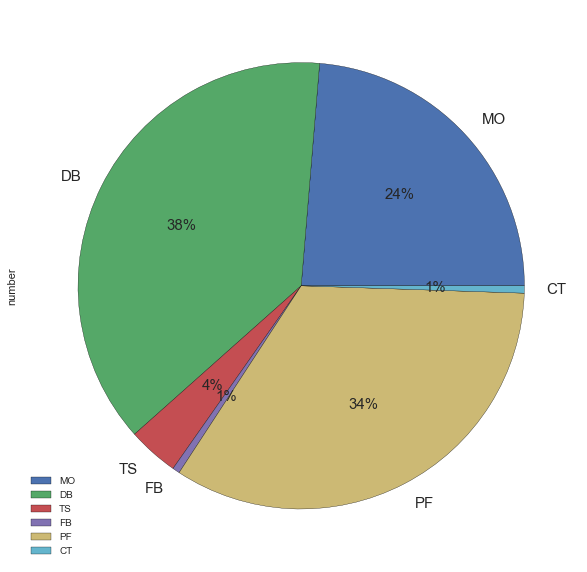

In [16]:
parameter_data_source_breakdown.plot.pie(figsize=(10,10), fontsize=15, subplots=True,autopct='%1.0f%%', colors = sns.color_palette())

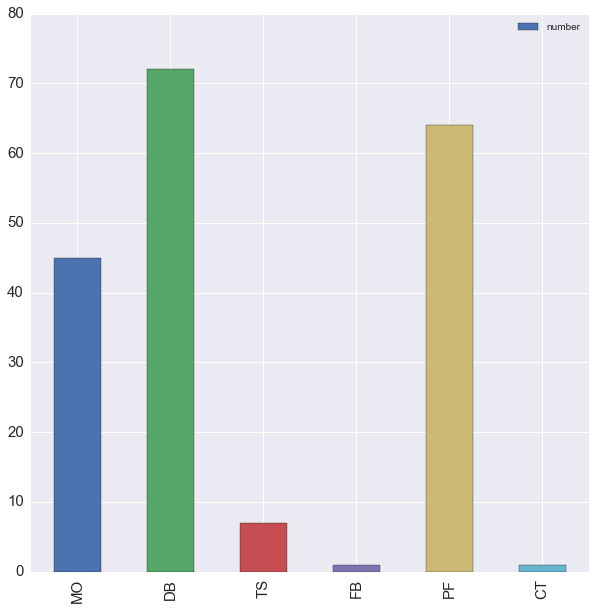

In [17]:
parameter_data_source_breakdown.plot.bar(figsize=(10,10), fontsize=15, color = sns.color_palette())

<h2>PARAMETER'S DATA SOURCES & DATA TYPES BREAKDOWN</h2>

In [22]:
#create empty dictionary for available data_types
data = {} 
for dtype in parameter_subset['data'].unique().tolist(): data[dtype] = 0
print(data)

{'PR': 0, 'TS': 0}


In [23]:
#count unique platform_code-plaform's data sources combos (same platform with code XXXX can works as several data sources: i.e vessels with TS (thermosalinometer) and CT (CTD))
for dtype in parameter_subset['data'].unique().tolist():
    subset = parameter_subset[parameter_subset['data']== dtype]
    temp = {}
    for data_source in subset['data_source'].unique().tolist():
        temp[data_source] = len(subset[subset['data_source']==data_source])
    data[dtype] = temp
print(data)

{'PR': {'PF': 396, 'CT': 3}, 'TS': {'FB': 30, 'MO': 1225, 'DB': 1661, 'TS': 116}}


In [24]:
parameter_dsource_datat_breakdown = pd.DataFrame(data=data)
parameter_dsource_datat_breakdown

,PR,TS
CT,3.0,NaN
DB,NaN,1661.0
FB,NaN,30.0
MO,NaN,1225.0
PF,396.0,NaN
TS,NaN,116.0


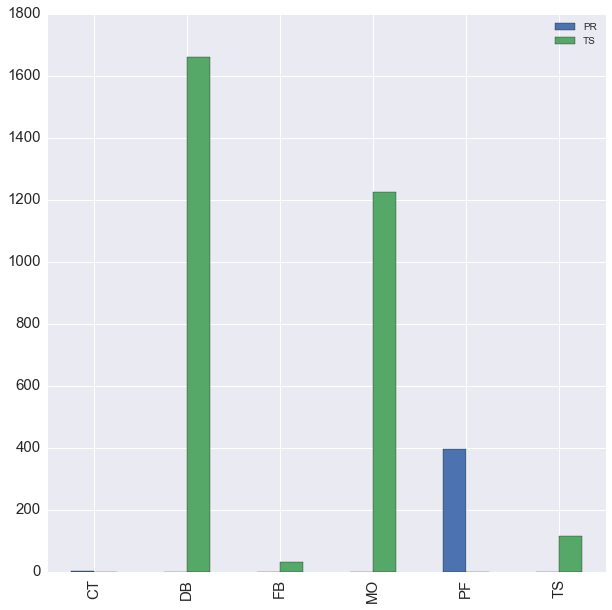

In [25]:
parameter_dsource_datat_breakdown.plot.bar(figsize=(10,10), fontsize=15, color = sns.color_palette())